# [1] 머신러닝 기초 강의

학습 방법 : 흐름을 읽을 수 있게 되면, 그 뼈대에 살을 붙여나가는 방식으로 배운다.

## 01 선형회귀 흐름읽기

In [46]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
heights = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]

print(len(weights))
print(len(heights))

10
10


##### 1. 데이터프레임 만들기
리스트로 사용해도 되지만, 판다스에서 제공하는 dataframe을 사용하는게 시각적으로도 좋고 관리하기도 편하다.

In [22]:
# 다양한 방법이 있지만 표현하기 편한 딕셔너리 형태로 데이터로 만들었다.
body_df = pd.DataFrame({
    "weight": weights,
    "height": heights
})

body_df.head(3)

,weight,height
0,87,187
1,81,174
2,82,179


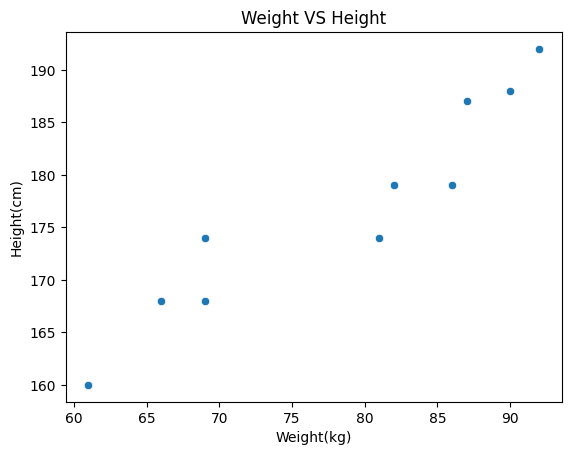

In [39]:
# 이제 시각화를 할 것이다. 쉽게 말해 산점도를 만든다. (sns_scatter plot이 직관적이다.)
sns.scatterplot(data = body_df, x = 'weight', y = 'height')
# sns가 plt을 상속하기 때문에 연관이 있기에 같이 섞어 써도 무방하다.
plt.title('Weight VS Height')
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')
plt.show()

##### 2. 선형회귀 적용
시각화한 두 개가 선형관계가 있음을 확인했고, 선형회귀를 적용할 수 있을거라고 판단됨.

##### 3. 설계도 가져오기

In [23]:
# 선형회귀 훈련(적합), 훈련한다=적합한다, train=fit

from sklearn.linear_model import LinearRegression # 선형 설계도안일 뿐이니 새로운 변수에 할당해야 한다.
model_lr = LinearRegression()

type(model_lr)

sklearn.linear_model._base.LinearRegression

##### 4. 데이터프레임의 이름 변경하기
 + 독립변수(x) = weight, 종속변수(y) = height 이기에 이름을 바꾸도록 한다.
 - 여기서 중요한 것
   - DataFrame [ ] : Series(시리즈)형태 데이터로 가져온다. (데이터 프레임의 컬럼에 대한 역할)
   - DataFrame [ [ ] ] : DataFrame 그대로 잘라서 가져온다.
 - 괄호 두개를 안쓰면 나중에 훈련시킬 때, 사소한 데이터의 차원 문제가 생긴다.
 + 일반적으로 y는 소문자로 사용한다.

In [24]:
x = body_df[['weight']] # Traning data
y = body_df[['height']] # Target value

In [25]:
x.head(3)

,weight
0,87
1,81
2,82


In [26]:
y.head(3)

,height
0,187
1,174
2,179


##### 5. 데이터 훈련시키기

In [27]:
model_lr.fit(x, y) # 튜터님처럼 x=x, y=y하면 버전이 달라서 오류난다. 순서만 맞추면 됨.

LinearRegression()

- 위의 결괏값은 지금 훈련이 잘 되었다는 표시이다.\
우리가 뭘 할거냐면 이제 훈련이 되었으니까 →\
훈련을 바탕으로 새로운 데이터가 들어오면 예측할 수 있다.

- fit이 완료되면 내부의 가중치를 찾는 과정(아직 안배움)을 통해서 model_lr 이라는 곳에 속성(Attributes) 값에다가 가중치 값들을 계산하여 알아서 넣는 것이다. 그 결과 아래처럼 저장이 잘 된 것을 볼 수 있다.
- 데이터 먹은 게 없으면 가중치나 편향값을 실행시켜도 나오는 게 없을 것이다. (당연함)
- 데이터가 들어가면 가중치, 편향도 나오고 방정식도 만들 수 있다.

In [28]:
# 가중치(w1)
print(model_lr.coef_)
# 편향(bias, W0), 절편값
print(model_lr.intercept_)

[[0.86251245]]
[109.36527488]


In [29]:
# 좀 더 깔끔하게 나타내기
# 저 값 자체를 가져오고 싶어서 수식으로 표현하려고 하는데
# 전자는 대괄호 두개 있는 2차원 구조의 값
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [30]:
# format함수로 데이터를 바로 집어넣을 수 있다.
print('y = {}x + {}'.format(w1, w0))

y = 0.8625124535821027x + 109.36527488452137


In [31]:
# 길어서 직관적이지 않으니까 round처리한다.
print('y = {}x + {}'.format(w1.round(2), w0.round(2)))

y = 0.86x + 109.37


= 해석 방법 : 키y는 몸무게x에 0.86을 곱한뒤 109.37을 더하면 된다.\
= 여기까지 내가 만든 모델에 대한 선형 방정식이 만들어졌다.

##### 6. 메서드에 대한 공식 문서 찾아보기
- 구글링 -> 블로그 상위노출
  - 단점: 늘 블로그가 바뀌고, 형태가 일정하지 않다.

- chatgpt LLM
  - 단점: 의존하게 되면 더 이상 공부를 안한다.
  - 거짓된 정보를 전달하는 경우도 있다.

- 공식 문서
  - 장점: 일괄되게 정리되어 있어서, 동일한 위치에 똑같은 문서가 항상 있다.
  - 자격증 시험: 공식문서만 열람할 수 있다.
  - 단점: 초보자가 읽기 어렵다.

1. 일단 자주 쓰는 함수를 구글에 검색한다.
2. 설명보다 예시를 먼저 확인한다.
3. 익숙해질 때까지 공식 문서를 자주 확인하도록 한다.
4. 내장문서로 확인할 수 있는 함수가 있다. help(sklearn.linear_model.LinearRegression)
5. 마우스 커서 갖다대면 나오는 정보로 확인하는 것도 가능하다.

## 02 평가지표 MSE 실습

제일 중요한 건 몸무게가 1키로 증가할 때 키가 0.86cm가 증가한다는 것이다.

여기서 MSE를 계산해보도록 한다. 그럼 예측값 - 실제값

- y = 0.86x + 109.37
- 식을 활용하여 기존 데이터프레임에다 값(예측 값, 예측 컬럼)을 추가한다. 10개 all
- 이걸 통해서 에러 값을 각각 계산(error)
- 양수를 만들기 위해 제곱할 것이다.
- 모두 더할 것이다.
- 최종 : MSE라는 개념이 도착한다.

In [32]:
body_df.head(3)

,weight,height
0,87,187
1,81,174
2,82,179


컬럼을 추가하는 건 쉽다. 내가 만들고 싶은 컬럼명을 적는다.

In [33]:
# 예측값 만들기
body_df['pred'] = body_df['weight']*w1 + w0 # 간단하게 식대로 계산하면 됨.
body_df.head(3)

,weight,height,pred
0,87,187,184.403858
1,81,174,179.228784
2,82,179,180.091296


우리가 예측 값을 만든 이유는 에러를 계산하기 위함이잖아. 에러를 계산해본다.

In [34]:
# 에러 만들기는 True값에 pred빼면 돼.
body_df['error'] = body_df['height'] - body_df['pred'] # 제곱할거라 순서 상관 없음
body_df.head(3)

,weight,height,pred,error
0,87,187,184.403858,2.596142
1,81,174,179.228784,-5.228784
2,82,179,180.091296,-1.091296


In [36]:
# 에러를 제곱한다.
body_df['error^2'] = body_df['error']*body_df['error']
body_df.head(3)

,weight,height,pred,error,error^2
0,87,187,184.403858,2.596142,6.739951
1,81,174,179.228784,-5.228784,27.340178
2,82,179,180.091296,-1.091296,1.190927


In [37]:
# 제곱값을 더해주고 데이터수만큼 나눈다.
body_df['error^2'].sum()/len(body_df)

10.152939045376309

최종적으로 MSE가 10이 되었다. 여기서 나온 "10"을 평가하는 것도 scikit learn에 있는 함수를 사용할 것이다.

그 전에 산점도 그래프를 찍었으니까 거기서 선형식을 만들어보자.

##### 산점도 그래프에 선형식을 만들어서 그래프로 그리기

<Axes: xlabel='weight', ylabel='height'>

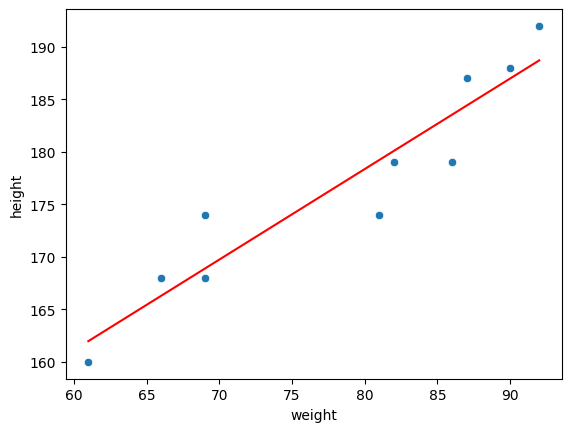

In [64]:
# 산점도 그래프
sns.scatterplot(data=body_df, x='weight', y='height')

# 현 상태에서 선형방정식 절편이 109였잖음. 109를 지나가는 선이 데이터로 학습이 됐으니까 그려본다.
sns.lineplot(data=body_df, x='weight', y='pred', color='red')

우리가 데이터로부터 학습한 선형회귀가 (직관적으로) 표시된 것이다.\
= 문제제기 단계에서 기대하던 선형회귀이다.

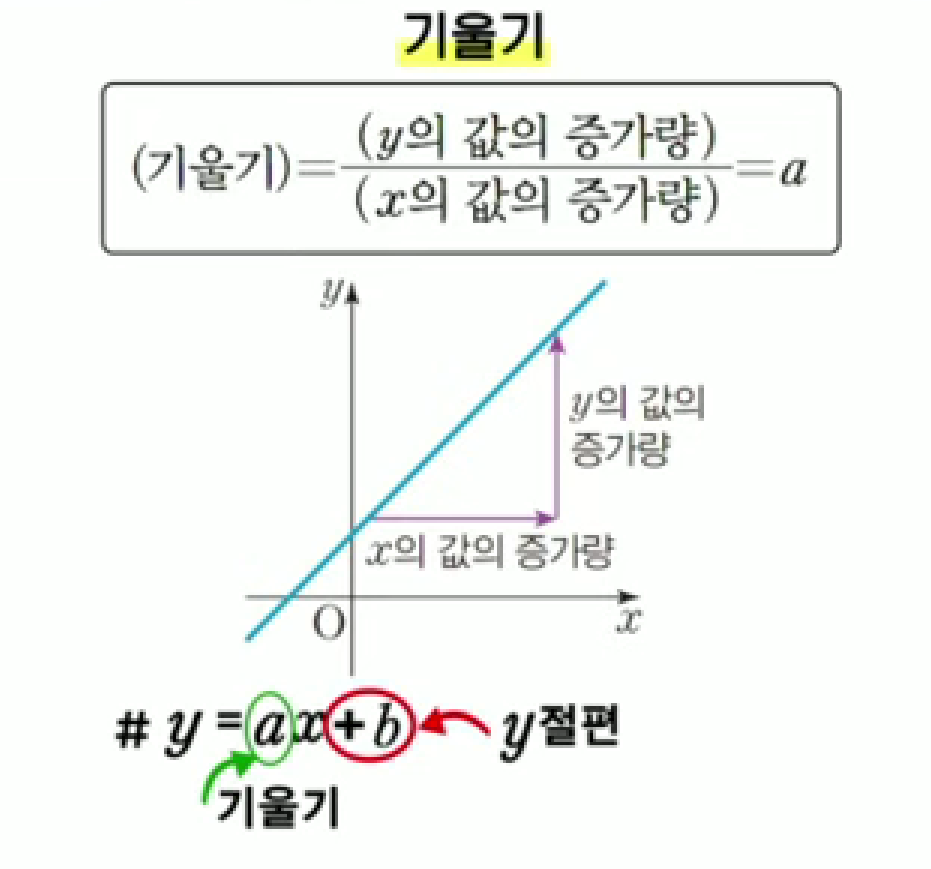

## 03 평가지표 R Square 실습

선형회귀 모델 평가 방법 2가지
1. 회귀(숫자를 맞추는 방법): MSE (수동계산은 10)
2. R Square: 값이 평균대비 설명력, 0이면 제일 낮음, 1일수록 높은 것. 높을수록 좋음.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score # 한번에 불러오기 꿀팁

"metrics = 평가" 함수만 불러오면 만드는 건 쉽다.

평가 함수는 공통적으로 정답(실제 ture), 예측값(실제 pred) 순서대로 들어간다.

In [69]:
y_true = body_df['height']
y_pred = body_df['pred']

mean_squared_error(y_true, y_pred) # 동일하게 나온다는 걸 알 수 있다.

10.152939045376309

In [71]:
# r2_score도 똑같이 할 수 있다.
r2_score(y_true, y_pred) # 꽤나 높은 수치

0.8899887415172141

몸무게와 키는 명확하게 연관 관계가 있어서 꽤나 높은 수치로 나온다. 여기서 잠깐!

우리가 예측값 pred 그대로 가져왔는데 사실 함수 있음. 바로 model_lr 이 predict 로 학습해뒀다.

In [74]:
# 내가 "정답"을 모르는 상태에서 "x값"만이 주어지기 때문애 들어가는게 x값 하나뿐임.
y_pred2 = model_lr.predict(body_df[['weight']]) # 대괄호 두개 = DataFrame 그대로 잘라오네?
y_pred2 # 여기에 넣어준다.

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

body_df['pred'] = body_df['weight']*w1 + w0 # dataframe 데이터프레임형

= model_lr.predict(body_df[['weight']]) # array 배열형 → 복잡해질수록 간단해진다.

In [76]:
mean_squared_error(y_true, y_pred2) # 똑같죵?

10.152939045376309

여기까지 단순선형 회귀를 만들고, 평가하고, 시각화까지 할 수 있게 됐다.

## 04 실제 데이터로 선형회귀 적용하기

seaborn 시각화 라이브러리는 기본적으로 데이터셋을 제공한다.

In [24]:
tips_df = sns.load_dataset('tips')
tips_df.head(3) # size는 식사인원이다.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


적합하기 전에 변수를 설정해야 한다. 어떤 걸 알아볼까?

사례: 머신이는 결심했다. 선형회귀를 배웠으니까 → 하나를 알면 다른 것을 알 수 있다고.\
따라서 **전체 주문 금액** 정보를 알면 **tip**을 예측할 수 있을 거라고 생각했다. 적용 go!

In [ ]:
# x: total_bill
# y: tip

산점도 그리기 : 직선이 있을 것으로 추정 됨.

<Axes: xlabel='total_bill', ylabel='tip'>

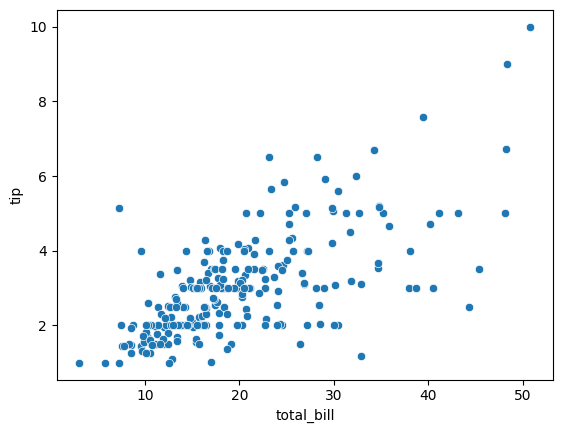

In [85]:
sns.scatterplot(data=tips_df, x='total_bill', y='tip')

모델 설계도를 다시 작성해야한다. 이전 키/몸무게 대한 모델은 거기에 학습해서 여기 적용 안돼.

In [25]:
model_lr2 = LinearRegression()

x = tips_df[['total_bill']]
y = tips_df[['tip']]

model_lr2.fit(x,y) # 바로 학습시킨다.

LinearRegression()

모델에 학습 시켰으니까 이제 예측값을 추출하기 위해 일차방정식을 풀어본다.

1. model_lr2 은 가중치 w1, 편향 w0를 두 개의 값을 이미 갖고 있다.
2. 방정식으로 보면 y(tip) = w1*(total_bill) + w0 이런 모습이다.
3. 이제 모델(얘)가 갖고 있는 값을 뱉어내라고 한다.

In [26]:
w1_tip = model_lr2.coef_[0][0]
w0_tip = model_lr2.intercept_[0]

가중치와 편향을 뱉어냈다. 이제 format함수를 이용해서 방정식 모양으로 출력하자.

In [27]:
print('y = {}x + {}'.format(w1_tip.round(2), w0_tip.round(2)))

y = 0.11x + 0.92


해석 1: 전체 결제금액이 1달러 오를 때, 팁은 0.11달러 추가된다.\
너무 적어서 직관적으로 보이게 스케일링 UP\
해석 2: 전체 결제금액이 100달러 오르면, 팁은 11달러 추가된다.\
= 약 10퍼센트 정도 오른다.

방정식을 만들었다. 이제 평가해야지. 예측값을 만들고 계산하기 좋게 실제 값을 새 변수에 넣어준다.

In [28]:
# 주어진 x값을 넣어서 y값을 예측하고 싶은거니까 x만을 이용해서 predict한다.
y_pred_tip = model_lr2.predict(tips_df[['total_bill']]) # 예측값

In [29]:
y_pred_tip[:5] # 잘 들었는지 확인

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ]])

In [30]:
y_true_tip = tips_df['tip'] # 실제값
y_true_tip[:5]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

평가 함수는 공통적으로 정답(실제 ture), 예측값(실제 pred) 순서대로 들어간다.

In [31]:
mean_squared_error(y_true_tip, y_pred_tip)

1.036019442011377

In [32]:
r2_score(y_true_tip, y_pred_tip) # mean_squared_error과 한쌍이다.

0.45661658635167657

몸무게와 키 간에는 mse가 10이고 지금은 1이니까 이 모듈이 더 좋은건가?

아니다 몸무게와 키는 kg, cm로 달러라는 단위와 스케일이 다르기 때문에 1:1로 비교할 수 없다.

그럼 mse는 언제 하는 건가요?

앞으로 다양한 모델을 적용할 때 그때마다 mse를 같은 데이터에서 다른 모델에 비교할 때 사용한다.

때문에 참고로 삼아서 1.0정도 나오는구나 생각하면 되는 거고

r2_score랑은 같이 비교해볼 수 있다. 이것은 사회 문화 경제 이런거에 따라서 기준이 조금 다르다.\
예를 들어, 사회문화통계 같은 경우에는 r2_score가 40 넘으면 좋게 본다.\
분야마다 적정 기준치가 존재한다.\

근데 몸무게와 키의 r2_score가 90가까이 되었던 걸로 기억한다.\
이건 0.45정도인 걸로 봐서는 좋은 모델은 아닐거라고 예상이 된다.\
= 때문에 모델을 바꿔 볼 필요가 있는 것으로 해석할 수 있다.

시각화도 해본다.

In [ ]:
sns.scatterplot(data = tips_df, x='total_bill', y='tip')
sns.lineplot(data = tips_df, x='total_bill', y='y_pred_tip')

문제는 데이터프레임이 저 예측 값이 없음. 넣어주면 돼. 간단.

In [109]:
tips_df[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [112]:
tips_df['pred'] = y_pred_tip # arry형도 잘 들어간다.
tips_df[:3]

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


<Axes: xlabel='total_bill', ylabel='tip'>

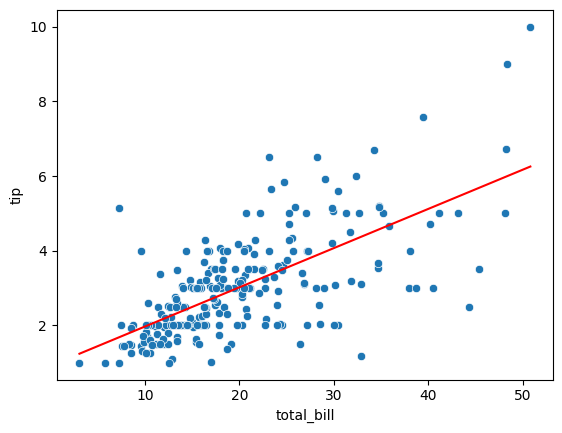

In [115]:
sns.scatterplot(data = tips_df, x='total_bill', y='tip')
sns.lineplot(data = tips_df, x='total_bill', y='pred', color='red')

1. 애매하다. 데이터 자체가 선을 기준으로 양옆으로 크게 퍼져있고,
2. 오른쪽 위의 점 네개를 따라가려면 더 기울어져야 될 것 같다.
3. 2차원이라서 그런데 실제로는 아래에 데이터가 굉장히 밀집되어 있다.
4. 선형회귀는 우리에게 보이는 것보다 아래에 낮게 설정되어 있다.

아무튼 문제는 r2_score가 낮은 게 문제다.

머신이는 전체금액말고 다른걸 변수로 넣어보고 싶어졌다.

→ 예컨대 (DS의 상상의 나래편) 남성이면 한턱 낸다고 크게 쓸 것이다.\
→ 그리고 툐요일, 일요일 주말에 더 많이 낼 수도 있겠다.\
→ 그렇게 x값에 여러 개를 넣어보고 싶어진거지.\
→ 지금까지는 x변수가 하나였거든. (y변수는 늘 하나여야 한다.)

x 변수에 "여러 개"가 포인트 = 이걸 다항 다중 선형 회귀라고 부른다.

선형회귀
 - 단순선형회귀: x변수가 1개
 - 다중선형회귀: x변수가 2개 이상

문제가 있다. total_bill, tip은 둘 다 연속형 변수이다. 다른건 숫자 아닌 범주형 변수이다.

다음 범주형 변수를 x에 넣는 방법과 다중 선형 회귀도 같이 알아보도록 한다.

여기까지

1. tip의 데이터를 적용해보고
2. r2_score가 낮으니까 더 올리기 위해
3. 변수를 추가하는 방안을 생각해서 보니까
4. 변수가 숫자가 아닌게 있는 상황이다.


## 05 범주형 데이터 사용하기

범주형 데이터 사용하기
- 함숙를 쓸 수도 있고, skleran에서 제공하는 함수를 쓸 수도 있음(4단원)
- 지금은 간단하게 실습해보도록 한다.

In [33]:
tips_df = sns.load_dataset('tips')
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


성별 데이터를 넣을 건데 Female 0, Male 1
- sklearn 함수를 쓰게 되면 숫자가 임의로 지정되는 이슈가 있어서 통일을 위해 적음.
- 순서에 의미가 있는 것은 아니다.

자료가 들어왔을 때 0과 1로 조건을 만드는 함수를 만들 것이다.

In [34]:
def get_sex(x):
    if x == 'Female':
        return 0
    else:
        return 1

1. 함수를 만든 이유는 행을 하나하나 훑으면서 함수를 적용해주는 DataFrame의 메서드가 있다.
2. 이 메서드는 Series(시리즈)로 넣어줘야 한다.
3. 간단한 전처리를 할 때 자주 사용된다.

In [35]:
tips_df['sex'].apply(get_sex)

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [36]:
tips_df['sex_en'] = tips_df['sex'].apply(get_sex)
tips_df[:3]

,total_bill,tip,sex,smoker,day,time,size,sex_en
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1


1. 모델설계도 가져오기
2. 학습
3. 평가

model_lr2는 안된다. 아까 만든 거 그건 단순 회귀 모델임.

In [37]:
from sklearn.linear_model import LinearRegression

model_lr3 = LinearRegression()
x = tips_df[['total_bill', 'sex_en']]
y = tips_df[['tip']]
# 새모델인데 왜 그대로라 넣을 필요없다고 하시는지? 이미 위에서 만들었나봐 어제.

변수 잘 입력되었는지 확인하기. [[]] 이렇게 데이터 프레임으로 가져와야지. 아니면 시리즈로 불러와진다.

In [15]:
x.head(3)

,total_bill,sex_en
0,16.99,0
1,10.34,1
2,21.01,1


In [16]:
y.head(3)

,tip
0,1.01
1,1.66
2,3.50


학습시키기

In [38]:
model_lr3.fit(x, y)

LinearRegression()

예측하기 (본인 데이터를 바탕으로)

In [39]:
model_lr3.predict(x) # 예측값 확인

array([[2.72117624],
       [1.99477235],
       [3.1176016 ],
       [3.39857199],
       [3.52094215],
       [3.56799609],
       [1.82955755],
       [3.73531553],
       [2.48936443],
       [2.46200401],
       [1.98740609],
       [4.6437714 ],
       [2.52935272],
       [2.84610212],
       [2.49387435],
       [3.17758404],
       [2.02032874],
       [2.62090487],
       [2.71907159],
       [3.07971795],
       [2.79243362],
       [3.06844301],
       [2.59279276],
       [5.05492929],
       [2.99237509],
       [2.78085806],
       [2.31362639],
       [2.24206839],
       [3.19021192],
       [3.00109431],
       [1.91163879],
       [2.83768353],
       [2.51807779],
       [3.11053596],
       [2.77770109],
       [3.43856029],
       [2.62300952],
       [2.7148623 ],
       [2.87346253],
       [4.19728558],
       [2.59459678],
       [2.74402673],
       [2.37360884],
       [1.92531899],
       [4.10573343],
       [2.83136959],
       [3.24598507],
       [4.316

In [40]:
y_pred_tip2 = model_lr3.predict(x) # 변수에 할당
y_pred_tip2[:5] # array형이라 슬라이싱으로 확인(프레임도 되던데)

array([[2.72117624],
       [1.99477235],
       [3.1176016 ],
       [3.39857199],
       [3.52094215]])

In [42]:
y_true_tip = tips_df['tip'] # 실제값
y_true_tip[:5] # 모델2에서 썼지만 직관적으로 또 써준다.

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

평가하기
- 근데 비교를 한번 해보자고?
- 첫 번째, 단순선형회귀 mse : x변수가 전체 금액만
- 두 번째, 다중선형회귀 mse : x변수가 전체 금액, 성별

In [43]:
print('단순선형회귀', mean_squared_error(y_true_tip, y_pred_tip))
print('다중선형회귀', mean_squared_error(y_true_tip, y_pred_tip2))

단순선형회귀 1.036019442011377
다중선형회귀 1.0358604137213614


1. 미묘하지만 별 차이가 없음.
2. 성별 변수가 그렇게 유용하지 않음.
3. 둘이 겹치는 게 있을 수 있음.
4. 독립 변수 간에 둘 다 설명하는 바가 비슷해서일 수도 있다.

In [44]:
print('단순선형회귀', r2_score(y_true_tip, y_pred_tip))
print('다중선형회귀', r2_score(y_true_tip, y_pred_tip2))

단순선형회귀 0.45661658635167657
다중선형회귀 0.45669999534149974


1. 아주 미묘하게 상승
2. 소수점 밑에까지 표기하기에는 컴퓨터 내부적으로 한계가 있어서
3. 완전히 밑에까지 다 믿을수는 없지만 미묘하게 변화했다.
4. 그렇게 좋은 건 아닌 듯

이상태에서 모든 데이터를 다 넣어서 결과를 만들 수도 있다.\
→ r2_score 가 늘어나고, mse가 감소하는 현상이 예상된다.

현재! 모델에서 부족한 점
1. 데이터 부족
2. 부족한 전처리
3. 데이터 확인도 많이 안함 (내부 데이터를 많이 확인할 필요가 있음)
4. 지금은 그냥 생각대로 만들어서
5. 지금 성능이 그렇게 좋아지지 않은 것을 볼 수 있다.
6. 사실 성별을 변수에 넣기 전에 필요한 단계가 있다.

사실 성별을 변수에 넣기 전에 필요한 단계가 있다.
- 진짜 "팁"데이터가 "성별"별로 차이가 있는지 데이터를 한 번 넣어볼 필요가 있었다.
- 아래에 4단원 맛보기

<Axes: xlabel='sex', ylabel='tip'>

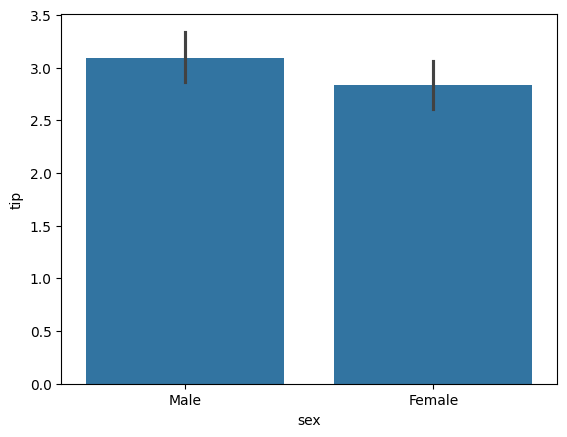

In [46]:
sns.barplot(data = tips_df, x = 'sex', y = 'tip')

1. 위의 바 차트는 성별에 따른 팁의 평균을 비교한 차트로,
2. 남성은 3, 여성은 2.8 값이 크게 차이나지 않음.
3. 이걸 전체 데이터에서 다 확인해봐야 하는 상황인데
4. 선형회귀모델 학습이 목표이기에 확인하지 않았던 문제가 있음.
5. 사전에 **"데이터 확인"** 하는 과정을 거치고
6. 머신러닝 모델에 의미가 있을 것을 넣는 것이 먼저 수행해야 할 과제였다.
7. 이걸 **"변수 선택"** 이라고 한다.

## 타이타닉 데이터 살펴보기

In [38]:
import pandas as pd

titanic_df = pd.read_csv('C:/sparta_python/titanic/train.csv') #, encoding = 'utf-8') # 난 인코딩 안해도 뜸.
titanic_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

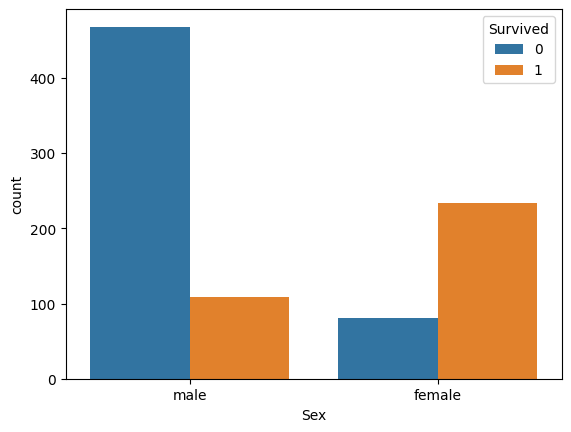

In [47]:
import seaborn as sns # 맷플롯 상위호환
sns.countplot(titanic_df, x = 'Sex', hue = 'Survived') # hue의 정확한 의미는 색깔이지만 범례로 통용된다.
# 갯수세는 막대그래프

y(=생존)을 예측하는 것은 성별이 강력할 거라는 느낌이 온다. > 베이스라인을 바탕으로 생존율과 정확도를 계산해본다.

### ＊baseline(롤베이스로 언급된)이란?

머신러닝에서 "베이스라인"이란?
1. 베이스라인은 모델을 구축하기 전에 기준으로 사용되며, 모델이 베이스라인을 넘어서는 성능을 보여야 해당 모델이 유의미하다고 평가된다.
2. 이는 모델 개발 과정에서 중요한 출발점이며, 실제 문제에 대한 모델의 성능을 정량적으로 평가하는 데 사용된다.

정확도를 베이스라인으로 사용할 수 있나?
1. yes, 정확도(accuracy)는 모델의 예측이 실제와 얼마나 일치하는지를 나타내는 지표 중 하나이다.
2. baseline으로써 정확도는 모델이 간단한 방법(예를 들어 다수 클래스 예측)을 사용하여 예측하는 경우에 해당한다.
3. 정확도를 베이스라인으로 사용할 때 주의할 점은 다음과 같다.
4. 클래스 불균형이 심한 경우에는 정확도가 신뢰할 수 없을 수 있다.
5. 어떤 클래스가 다른 클래스보다 훨씬 많은 경우, 모델이 항상 그 클래스를 예측하는 간단한 방법으로도 높은 정확도가 나온다.
6. 따라서 클래스 불균형이 있는 경우에는 다른 평가 지표(예: 정밀도, 재현율, F1 스코어)도 함께 고려하는 것이 좋다.
7. 베이스라인을 설정할 때 데이터의 특성을 고려하여 적절한 평가 지표를 선택하는 것이 중요하다.

### 생존율을 바탕으로 정확도 계산하기

가설:
1. 비상상활특성상 여성을 배려해서 많이 생존했을 것이다.
   - pivot table을 만들어서 확인
   - 그래프를 통해서 확인

In [12]:
pd.pivot_table(titanic_df, index = 'Sex', columns = 'Survived', aggfunc='size')

Survived,0,1
Sex,,
female,81,233
male,468,109


여성이 더 많이 생존했다.

새로운 걸 더 배우고 싶다면 구글에 'pandas pivot table' 을 검색해보는 편이다.

만약 이 함수를 처음 배웠다면 파이썬독스의 예시를 따라쳐보고, 전달인자를 바꿔보는 등 연습해본다.

In [15]:
# 전체 데이터
len(titanic_df)

891

- 정확도(Accuracy) 계산: 맞춘 갯수 / 전체 데이터 개수(891)
- 생존을 맞춤
  - 여성은 다 살았을 것(233)이고, 남성은 모두 죽었을 것(468)이다. < 라고 가정함.

In [16]:
(233+468)/891*100 # 78%에 해당하는 좋은 모형을 만듬, 변수 하나로 이렇게 높게 만든 건 좋은 모형이다.

78.67564534231201

우리는 모형을 만들지 않고도 80%에 가까운 정확도를 만들었다.\
이건 데이터 알고리즘으로 적용한게 아니라 룰 베이스라는\
규칙으로 맞춘거라 데이터 사이언티픽하게 만들어보는 과정을 배우도록 한다!

## 로지스틱회귀 실습

학습 방향: 입문자를 위해 최소한의 전처리 작업만으로 실습을 시작하여 코드모델을 세워보고 평가해보고 점차 영역을 확장해가는 방법으로 배울 것이다.

### 자주 사용하는 함수

sklearn.linear_model.LogisticRegression 에서 linear 라는 의미는 가중치(w0)가 x에 대해서 값이 하나로 정해진다. x가 증가할 때마다 가중치가 하나씩 증가한다고해서 선형모델이라는 경로에 들어가는데 실제로는 아까 배운 것처럼 e(자연지수)가 밑으로 들어가서 훨씬 큰 값이 나온다고 한거 기억나는지? 이런 맥락에서 linear model이라고 이름이 붙여졌다.

- `sklearn.linear_model.LogisticRegression` : 로지스틱회귀 모델 클래스 (LoR)
    - 속성
        - `classes_`: 모델에서 학습된 클래스의 레이블(label)을 반환한다. 이진 분류에서는 y=0 or y=1이니까 0, 1만 나온다. 다중 클래스 분류에서는 모든 클래스의 레이블이 포함된 배열이 반환된다. 이값을 통해 모델이 학습한 클래스의 순서를 확인할 수 있다.
        - `n_features_in_` : 들어간 독립변수(X) 개수
        - `feature_names_in_`: 들어간 독립변수(X)의 이름
        - `coef_`: 가중치(w0)
        - `intercept_`: 바이어스(w1)
    - 메소드
        - `fit`: 데이터 학습 (머신러닝의 거의 모든 함수에 똑같이 있는 메소드)
        - `predict`: 데이터 예측
        - `predict_proba`: 생존여부를 0,1으로 보여주는데 이에 대한 자세한 확률 (특이점)
- `sklearn.metrics.accuracy`: 정확도
- `sklearn.metrics.f1_socre`: f1_score

### ＊속성과 메소드의 차이는?

속성(Attribute): 모델의 상태나 정보를 제공\
메소드(Method): 특정 동작을 수행

### ＊클래스 레이블이란?

클래스 레이블은 지도 학습(Supervised Learning)에서 사용되는 용어로, 각각의 데이터 포인트가 어떤 클래스에 속하는지를 나타내는 레이블 또는 타깃 값이다.

이것은 분류(Classification) 문제에서 사용하는 용어로, 예를 들어 스팸 메일 여부를 판별하는 모델을 만든다고 가정해보자.

클래스 레이블이 0이라면: "정상"\
클래스 레이블이 1이라면: "스팸"

여기서 Logistic Regression 모델을 훈련시키면, classes_ 속성은 학습된 클래스 레이블을 나타낸다. 따라서 예시의 클래스라는 속성 값은 [0, 1]일 것으로 예상된다.

### ＊데이터 포인트란?

예를 들어, 만약 학생들의 시험 점수를 담고 있는 데이터 세트가 있다면, 각 학생의 시험 점수가 하나의 데이터 포인트가 된다. 이것은 특정 학생에 대한 정보를 담고 있다.

데이터 포인트는 특정 상황이나 조사에서 관찰되거나 측정된 개별적인 사례를 나타내며, 이러한 개별 사례들이 모여 데이터 세트를 형성한다.

### ＊클래스 레이블이란?

일반적으로 데이터 포인트가 어떤 클래스에 속하는지를 나타내는 정보이며, 지도 학습(Supervised Learning)에서 주로 사용된다.

지도 학습에서는 학습 데이터에 각 데이터 포인트에 대한 정확한 레이블이 주어진 상태에서 모델을 학습시킨다.

예를 들어, 스팸 메일 필터링의 경우, 각 이메일은 "스팸" 또는 "정상"과 같은 클래스에 속합니다. 여기서 "스팸" 또는 "정상"이 레이블이 되는 것입니다.

레이블은 모델이 학습할 때 올바른 예측을 하기 위한 중요한 정보이며, 모델이 학습한 후에는 새로운 입력에 대해 어떤 클래스에 속하는지 예측하는 데 사용됩니다.

### ＊바이어스(intercept)란?

- 선형회귀모델 `y = w0x + w1`
- x는 입력 변수, y는 예측값
- w0는 입력 변수에 대한 가중치, `w1`은 바이어스(bias) 또는 y절편이라고 한다.
- 선형회귀모델은 주어진 입력 변수(x)에 대해 가중치(w0)를 곱하고 이를 합산한 다음
- 거기에 바이어스(상수항)를 더해 예측값을 계산한다.
-  scikit-learn에서는 이 값이 `intercept` 속성으로 제공된다.

### 데이터프레임 불러오기

In [48]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 데이터 탐색하는 중

1. 내부 데이터를 자주 보고 여러가지로 탐색해야 한다.

2. 데이터를 판단하는 기준은 일단 2개다 : 숫자거나 숫자가 아니거나

3. ^쓸만한^ 데이터 분류하기 (8개)
    - 숫자형
        - Age : 나이
        - SibSp : 승객의 형제와 배우자 수
        - Parch : 승객의 부모님과 자식 수
        - Fare : 요금
    
    - 범주형
        - Pclass : 티켓등급 1/2/3, 숫자 형태의 범주형 변수(이산형 변수)
        - Sex : 성별
        - Cabin : 객실이름, 결측치가 너무 많아서 현상황에선 pass도 좋음
        - Embarked : 승선한 항구 C/Q/S

x변수 1개 선정, y변수는 Survived(불변)라고 한다.

BUT 데이터에 대한 '기술통계'나 'null값'이나 하나도 안봐서 간단하게 보는 방법은?

`info()` : 데이터에 대한 결측치, 데이터 전체갯수 등을 알려준다.

In [49]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


entries: 전체 데이터 수 891개\
columns: 컬럼의 수 12개\
PassengerID: 식별자라서 의미없음\
891 non-null: 비어있지 않은 값이 891개

age: 결측치 존재 → 처리가 필요해서 보류\
Cabin: 결측치 존재 → 전처리 필요 → 보류\
.\
.\
.

변수들 중에서 계산하기 쉽게 `float64`로 숫자형 변수 중에서 결측치 없는 `Fare`부터 실습해보자.

In [54]:
# x변수는 Fare, y변수는 Survived
x_1 = titanic_df[['Fare']] # df형으로 넣음
y_true = titanic_df[['Survived']] # 나중에 예측값이랑 비교할거니까 미리 true라는 별칭추가

우리가 기대하는 이상적인 그림은 LoR 그래프인데 이게 될지? 일단 1. 산점도를 봐보자고

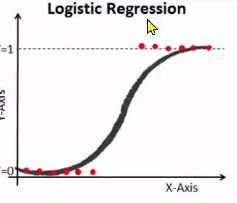

<Axes: xlabel='Fare', ylabel='Survived'>

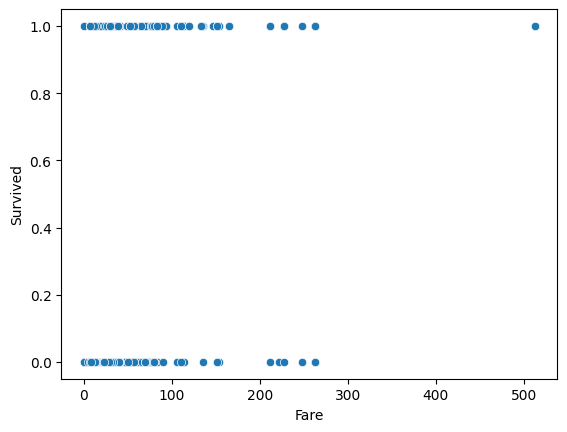

In [43]:
sns.scatterplot(data = titanic_df, x = 'Fare', y = 'Survived')

# 0과 1사이에 값은 그냥 임의로 써졌다는 것 같음 0, 1뿐이니 신경X

이것이 이상과 현실의 차이다. 일단 원하는 모양으로도 안나왔고, 밀집된 데이터들의 밀도도 알 수 없고, 요금이 높은 사람들이 생존을 많이하길 바랐는데 수치가 높지도 않음.

데이터 전처리 과정이 없었기 때문이다. 실제로는 바로 산점도를 보는 것 보다 요금에 대한 분포(히스토그램, 데이터들의 밀도를 보려고)를 보는게 더 중요했다.

데이터 훈련시키기 전에 여러가지로 봐보는 과정이다.

히스토그램의 y축은 관측치의 개수=데이터의 개수가 기본값이라 x만 써준다.

<Axes: xlabel='Fare', ylabel='Count'>

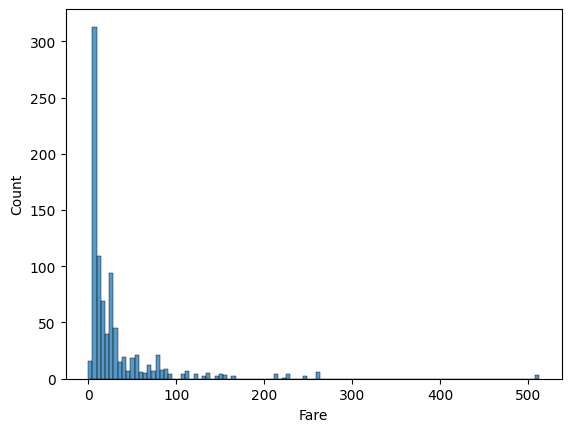

In [44]:
sns.histplot(data=titanic_df, x='Fare')

데이터의 개수가 약 900개인데 대부분의 값이 10달러 정도에 분포된 것을 알 수 있다.

500달러라는 매우 큰 값도 있는데 이상치인지 득급좌석인지 알 수 없다. 제거할지 말지는 고민해 볼 사항이다.

여기서 한단계 더 나아가서

데이터 2. 기술통계 보는 방법(수치형 변수): describe() #묘사하다

In [55]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


식별자는? 의미없고,
생존변수도 0, 1이라서 의미없고,
관심있는 Fare를 유심해 봐본다.

전체 데이터 수는 891개, 평균값이 32달러, 표준편차 49(굉장히 큼), 중위(50%)값 14달러. (그리고 최빈값은 이것보다 작은 것이다. 최빈값은 14달러보다 더 이히이다. 대충 10달러가 많은 것으로 보임.)

나머지도 확인할 수 있지만 지금 Fare를 위주로 볼거라서 Fare만 해석해보기로 한다.

이 상태에서 데이터 모델을 불러와 본다. 모델 이름은 임의로 lor이라고 정할 것이다.

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model_lor = LogisticRegression() # 1.설계도를 불러오고
model_lor.fit(x_1, y_true) # 2.데이터 적합해본다.

C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### 잠깐! 셀프 개념정리

`회귀 분석`에서는 주어진 데이터를 이용하여 독립 변수들과 종속 변수 간의 관계를 모델링하고,

(회귀 모델은 주어진 독립 변수(입력 변수)들을 사용하여

데이터에 가장 적합한 기울기와 y 절편을 찾아내어 새로운 x 값에 대한 y 값을 예측한다.)

이를 통해, 새로운 입력(x)에 대한 종속 변수(y)의 값을 예측하는 것이 목표이다.

예를 들어, 선형 회귀 모델의 경우 일반적으로 다음과 같은 형태의 수식을 가진다.

y=mx+b

여기서 y는 종속 변수(예측값), x는 독립 변수(입력 변수), m은 기울기, b는 y 절편을 나타낸다.

### 다시 시작!

여기에 대해서 아까 배웠던 모델의 속성들을 두번이상 확인할거라 번거롭지 않으려고 속성 출력하는 함수를 만들어본다.

In [63]:
def get_att(x): # x는 모델 넣을 것임. 언더바를 주의한다.
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('입력된 독립변수의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

In [64]:
get_att(model_lor)

클래스 종류 [0 1]
독립변수 갯수 1
입력된 독립변수의 이름 ['Fare']
가중치 [[0.01519617]]
바이어스 [-0.94129222]


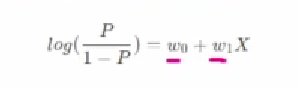

가중치와 바이어스를 구했다. 선형회귀처럼 함수로 만들지 않고 바로 predict해서 결과로 보겠다.

→ 데이터를 밀어 넣고 모델을 만들고 속성도 확인했으니 predict를 해본다.

평가에 대한 메소드를 작성한다. 회귀도 metrics에서 mse, r square를 불러온 거랑 같음.

In [66]:
from sklearn.metrics import accuracy_score, f1_score

얘도 함수를 만들어보자.

In [77]:
def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1-score', f1_score(true, pred)) # 평가지표는 정답과 예측값 들어가는 순서가 다 같다.

예측값을 구해야한다.

In [68]:
# y_true = titanic_df[['Survived']]
# y_pred = 구하기 → 첫 번째 독립변수라 y_pred_1로 하기로
model_lor.predict(x_1) # 891개의 데이터를 순서대로 생존/사망했는지 array형으로 보여준다.

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [74]:
y_pred_1 = model_lor.predict(x_1) # 복잡하니까 변수에 넣어주고 슬라이싱으로 확인한다.
y_pred_1[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
len(y_pred_1) # 데이터수도 확인해주고, 데이터만 제대로 들어가면 틀릴 일은 없지만 말이다.

891

모두 준비가 됐으니 평가해본다.

In [78]:
get_metrics(y_true, y_pred_1)

정확도 0.6655443322109988
f1-score 0.354978354978355


정확도는 66%, f1-score는 35다. 정확도에 비해 f1-score 굉장히 낮으니 좋은 x모델은 아닌걸로 판단된다. 정확도도 아까 성별로 룰베이스를 했을 때 거의 80%였는데 이번 결과를 보니 fare자체가 성별에 좋은 데이터는 아닌 것으로 판단된다. (전처리를 하지 않은 현재 상태에서는) 변수를 추가하거나 만들어야 할 것으로 보인다.

여기까지가 1차적으로 가장 간단한 로지스틱회귀 실습이었다.

## 다중 로지스틱회귀 실습

쓸만하다고 정리해 둔 데이터를 다시 가져와보도록 한다.

- 쓸만한 데이터 분류(8개)
    - 숫자형
        - Age : 나이
        - SibSp : 승객의 형제와 배우자 수
        - Parch : 승객의 부모님과 자식 수
        - Fare : 요금
    
    - 범주형
        - Pclass : 티켓등급 1/2/3, 숫자 형태의 범주형 변수(이산형 변수)
        - Sex : 성별
        - Cabin : 객실이름, 결측치가 너무 많아서 현상황에선 pass도 좋음
        - Embarked : 승선한 항구 C/Q/S

동일한 조건에서 데이터를 한번 훑어봐야 한다. 그럴 때 info함수가 좋음.

In [79]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


조건 1. 빈값이 없어야 한다. (Pclass, Sex, Fare, embarked 인코딩...)

In [ ]:
# y는 당연히 Survived
# x는 pclass(좌석등급), Sex, Fare

Embared(승선항구)는 데이터 2개 부족으로 뺀다: 사실 2개 정도면 데이터를 삭제해도 되고 최빈값을 넣어도 되는데 간단하게 할거라 세 개정도만 실습을 해본다.

x변수는 다시 수치형과 범주형으로 나눌 수 있다. (수치형: Fare, 범주형: Pclass, Sex)

Pclass : int64 정수형 숫자라서 변경 필요없음.\
Sex : 문자형(object)이라 성별을 바꿔야 됨.

In [81]:
def get_sex(x):
    if x == 'female':
        return 0
    else:
        return 1

자동으로 알파벳 순서대로 문자를 숫자로 바꿔주는 함수가 있어서 같이 일관성 있게 맞추려고 여성을 0으로 맞춤. 정확하게 대문자인지 소문자인지도 체크한다.

In [86]:
titanic_df['Sex_en'] = titanic_df['Sex'].apply(get_sex)
titanic_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_en
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [87]:
x_2 = titanic_df[['Pclass', 'Sex_en', 'Fare']] # 순서 무상관
y_true = titanic_df[['Survived']] # 1. x,y정의하기

In [88]:
model_lor_2 = LogisticRegression() # 2. 모델 설계도 가져오기
model_lor_2.fit(x_2,y_true) # 3. 데이터 학습시키기

C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

제대로 만들어졌는디 확인하기

In [89]:
get_att(model_lor_2)

클래스 종류 [0 1]
독립변수 갯수 3
입력된 독립변수의 이름 ['Pclass' 'Sex_en' 'Fare']
가중치 [[-8.88331324e-01 -2.53993425e+00  1.64019087e-03]]
바이어스 [3.02004403]


현재 상황 수식 참고 사진

![스크린샷 2024-02-04 192619.png](<attachment:스크린샷 2024-02-04 192619.png>)
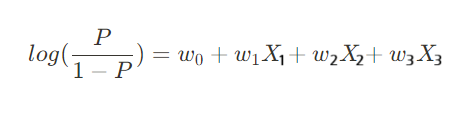

참고만 하고 우리엑 중요한 것은 예측값(y) 1개를 확인해보는 것이다.

In [91]:
y_pred_2 = model_lor_2.predict(x_2)
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [92]:
y_pred_1[:10] # 비교용

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

정보가 많아서 그런지 변화값이 보인다. 이제 결과를 판단해본다.

In [95]:
# x변수가 Fare(비교용)
get_metrics(y_true, y_pred_1)
# x변수가 Fare, Pclass, Sex
get_metrics(y_true, y_pred_2)

정확도 0.6655443322109988
f1-score 0.354978354978355
정확도 0.7867564534231201
f1-score 0.7121212121212122


Q. 정확도가 성별로 했던 값이 80%정도 였는데 열심히 모델 돌렸는데 베이스라인만 못하네요?

A. 우리는 f1-score에 주목해야 한다. 아까처럼 남성은 다 죽고 여성은 살았다를 베이스라인으로 하게 되면 f1-score가 매우 좋지 않음. 0이다.

근데 metrics을 만들어서 여성이라도 죽은 사람, 남성이라도 생존한 사람을 예측할 수 있어서 f1-score는 지금이 훨씬 더 좋다.

여기서 더 나아가 데이터처리를 좀 더 하면 정확도도 베이스라인으로 하는 거보다 훨씬 더 올라갈 수 있다.

### 여기까지 다중회귀 실습완료

각 데이터별 Y=1(생존)인 확률 뽑아내는 메소드가 있다.

In [96]:
model_lor_2.predict_proba(x_2)

array([[0.8977979 , 0.1022021 ],
       [0.09546762, 0.90453238],
       [0.40901264, 0.59098736],
       ...,
       [0.40287202, 0.59712798],
       [0.58880217, 0.41119783],
       [0.89772263, 0.10227737]])

이것은 데이터가 2차원 구조로 리스트 하나가 데이터 하나이다.

그래서 [A, B] 각각이 어떤 확률을 의미힌다.

그럼 첫 번째 사람이 사망할 확률이 89%, 생존할 확률이 10% = 'y=0' 사망으로 예측됨.

In [97]:
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

정확히는 0.5라는 임곗값 기준으로 생존 확률이 낮으니까 0으로 판단했다.

두 메소드의 차이는?
1. predict_proba: 사망/생존이라는 두 컬럼을 가진 df 형식으로 표현한 데이터 셋과 같음.
2. pedict: 0.5 기준으로 다 처리해버리기 때문에 위와 달라보이는 것 뿐이다.

## 로지스틱회귀 마무리

머신러닝을 처음에 공부하는 입장에서 무엇을 봐야할까?

1. skleran 홈페이지 > linear_model > 버전확인

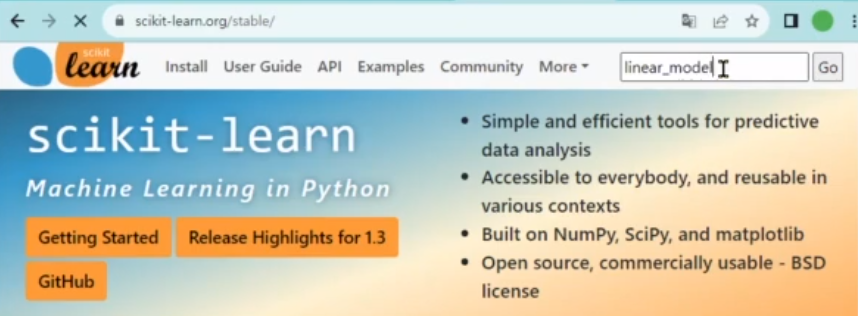

2. 버전 확인하는 방법

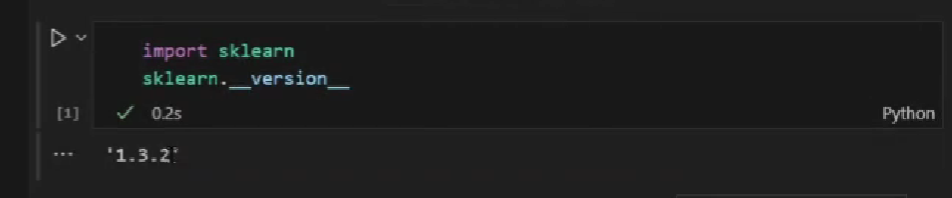

3. 보기 힘들어서 API 레퍼런스로 들어옴.

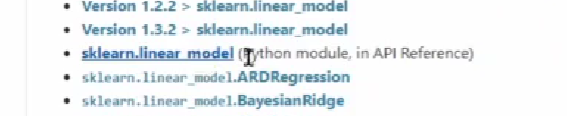

4. linear_model 클릭하면 아래와 같은 페이지가 나온다.

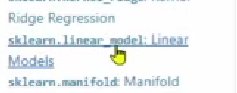
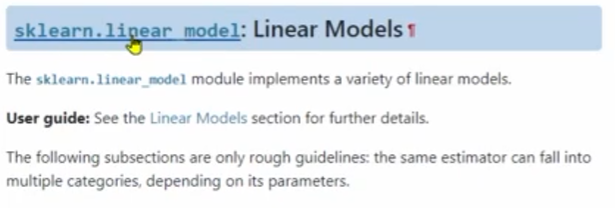

5. Linear classifiers 선형분류기(종속변수가 범주형) > 여러 선형모델 중에 `로지스틱회귀`를 사용한 것임.

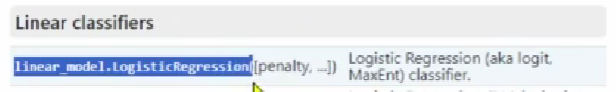

6. Classical linear regressors 선형회귀(숫자를 맞춤) > `선형회귀모델` 맨 처음에 배움.

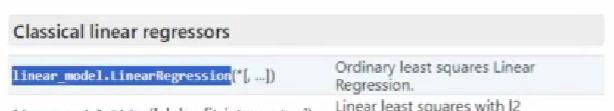

머신러닝을 더 학습한다면 그 아래에 있는 다른 모델도 써볼 수 있겠다.

일단 배운 모델에 대해 확인해보자면 속성도 볼 수 있고 examples(예시), decision, fit(어떤 머신러닝이든 존재), predict, proba(로지스틱은 특정 사건의 확률을 뱉어내기 때문에 proba도 당연히 존재) 등등 fit, predict가 정말 핵심적인 메소드이다. fit을 누르면 상세 설명 페이지로 이동한다.

만약 제한된 환경이라면 보기는 어렵지만 에디터 내에서 help 명령어를 이용하여 봐도 된다^^

중요) 회사마다 버전이 다르니까 버전 관리 같은걸 꼭 확인해보고 체크하도록!

sklearn은 굉장히 자주 사용하고 워낙 커뮤니티가 발달되어 있어서 버그나 호환성 이슈가 많진 않음. 딥러닝 프레임워크 같은 최신 라이브러리를 사용하는 경우에는 버전 이슈가 굉장히 많음. 그럴 때 이런 소스에 들어가서 로우 데이터를 확인해 본 경험도 있다. 함수가 파이썬으로 이루어져서 대략적으로 메소드나 맥락을 확인할 수 있다.

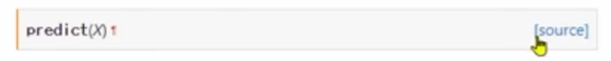

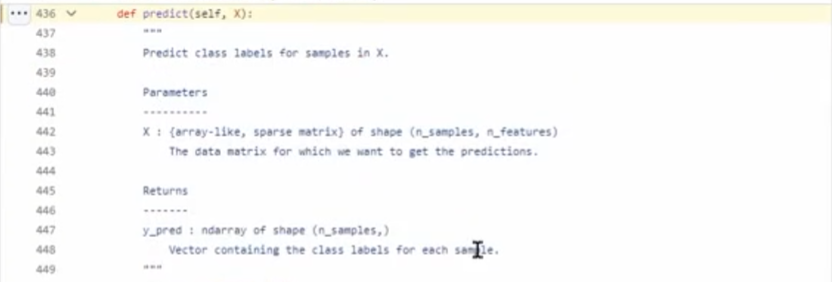

`머신러닝`을 만들면 `평가`는 자연스럽게 따라와야한다. 중요중요중요

내부 로직을 이해 못하더라도 평가는 반드시 해야할 정도라고 하니까.

평가는 모델의 척도이기 때문에.

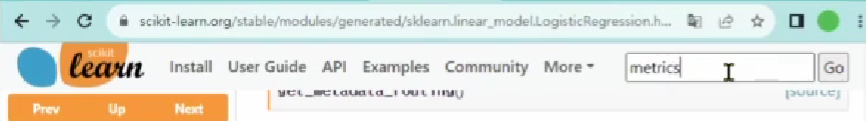

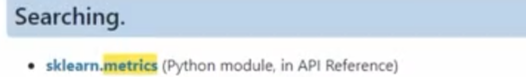

Classification metrics
- accuracy_score
- confusion_matrix(오분류표)
- f1_score

Regression metrics
- mean_squared_error
- r2_score

등을 확인할 수 있다.


이렇게 평가에 대한 문서도 잘 정리되어 있다.

우리가 해야하는 것은 우리 모델에 잘 평가할 수 있는 척도를 찾아서 쓰는 것이다.

정확도 같은 경우에는 언밸런스엔 데이터 셋에는 좋지 않다고 했다.

이런 경우에는 f1-score를 믿는다는지 이런 방향으로 확인할 수 있다.

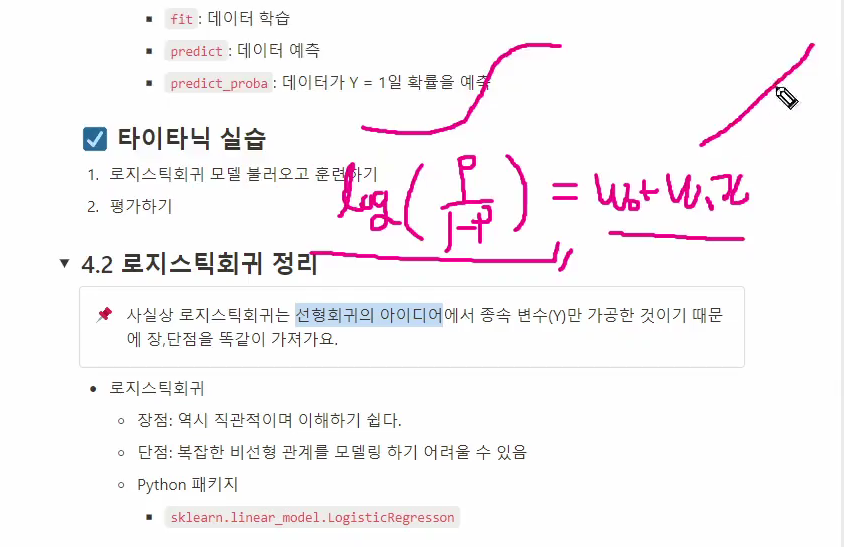

로지스틱회귀 정리
1. 좌변과 우변을 더해서 로지스틱회귀라는 독특한 모델을 만들었다.
2. 최신모델 보다는 이해하기 쉬움.
3. 해석력이 좋은 편이다. 모델의 해석력(이해하기 좋은 것)과 정확도는 trade off 관계에 있다.
    - 예로, 오직 선형회귀로 접근을 한다는 분도 계셨음. 해석력이 좋아서. 의사결정과정에 이야기하기 좋으니까. 회귀의 강력한 예...
4. 파이썬 패키지: sklearn.linear_medel.LogisticRegression

통계학과 회귀모델을 뗄 수 없어서 linear 모델을 파면 끝도 없다. 이거 잘하면 1인분 가능하다.

### 로지스틱회귀 과제

이전) tips 데이터를 이용하여 다양한 변수를 넣고 빼면서, 가장 높은 r2 score를 만들어보자.

titanic 데이터를 이용해서 다양한 변수를 넣고 빼면서, 가장 높은 f1 score를 만들어보자.

## 모델링의 기본 마무리

머신러닝에서 가장 중요한 "용의 머리" 두 가지를 배웠다. 회귀(숫자 맞추기), 분류(카테고리(범주) 맞추기).

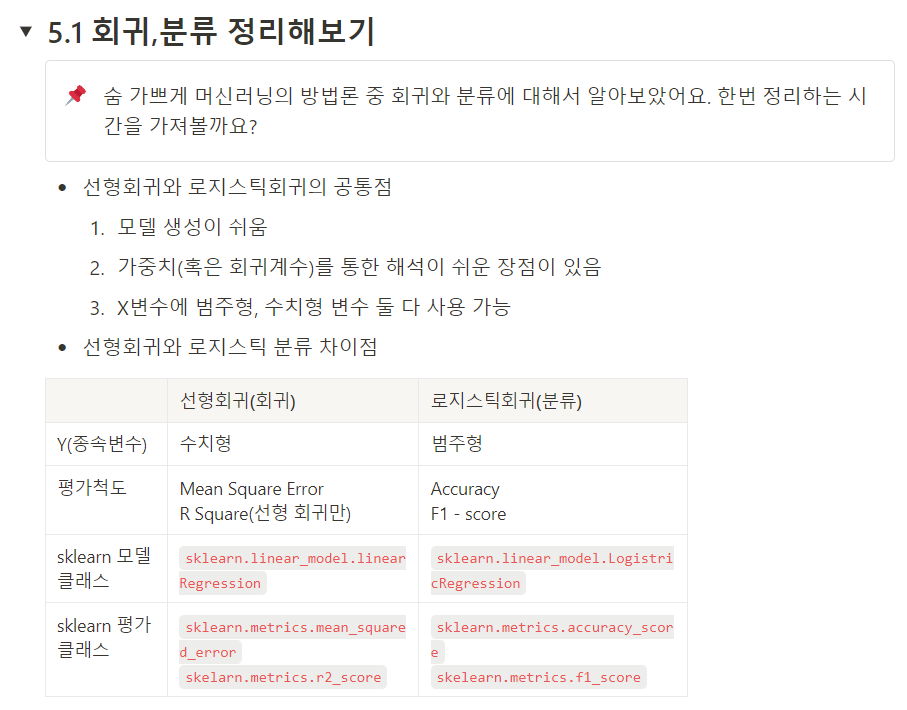

y값의 차이가 제일 크다.

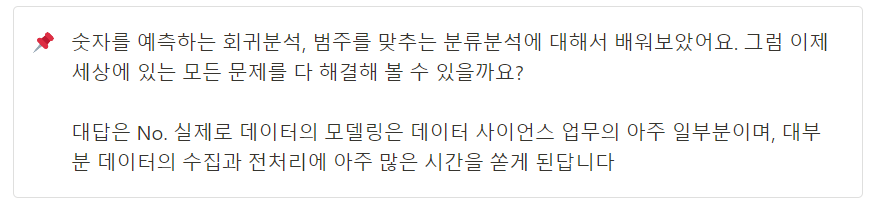

실제로는 모델링을 포함한 데이터 분석은 굉장히 일부이다.

데이터 수집과 전처리에 아주 많은 시간을 투자하게 될 것이다.

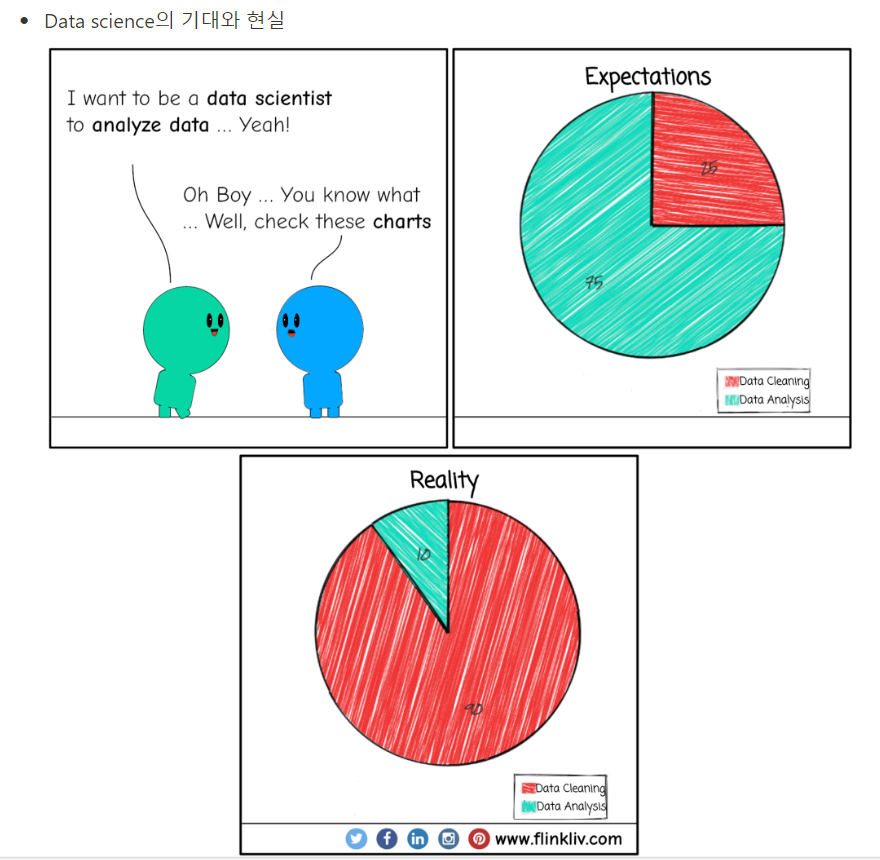

데이터분석을 해보면 결과가 안좋게 나오는 경우가 생길 것이다.

"모델은 죄가 없다."

다 데이터 품질에 대해서 문제가 있는 것이다.

그래서 데이터 클렌징에 대한 이슈가 굉장히 크다. 이 중요성에 대해 인지해두자.

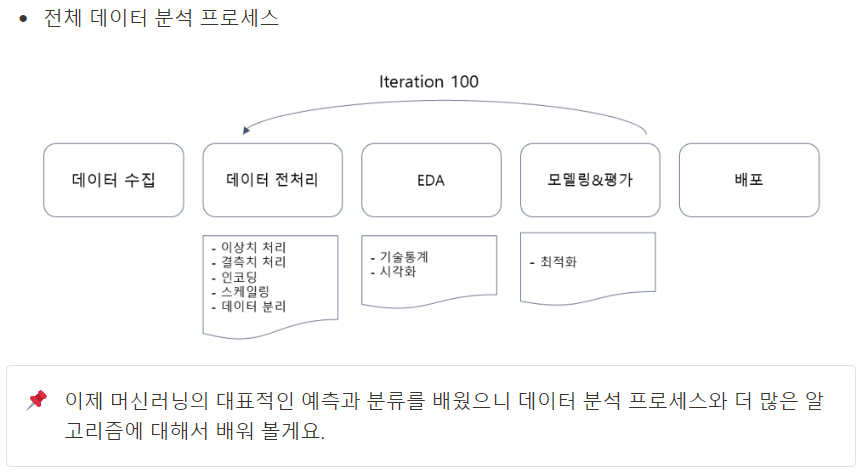

모델링이라는 것은 실제 업무에서는 일부 10%의 정도이다.

항상 모델링하고 평가해보고 전처리해보고 데이터 추가해보고 전처리하고 평가하고 다시 돌아가고 한 100..번..쯤..

아무튼 데이터 전처리의 중요성을 역설해주심. 내가 프로젝트할 때 전처리에 공을 들인게 헛시간 쓴 게 아니었구나.

### 다음 학습은

＊최신의 모델을 하나씩 배워가면 된다. 의사결정 나무, 부스팅 모델...

이것은 모델을 넣고 파라미터를 얼마나 잘 바꾸나 차이지 (모델 제작 부분은 떠나서)

데이터 평가 결과를 좋게 하는 것은 전처리. 전처리가 굉장히 중요하다.

다음부터는 전처리 과정에 대해 학습할 것이다.

＊앞으로의 진도는 머신러닝이라는 큰 하나의 줄기

[1] 회귀(살짝 통계를 가미해 옆으로 샜지만), [2] 분류라는 큰 줄기에서 크게 벗어나지 않을 것이다.

살짝 피벗 왔다갔다하는 정도로...